          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0    2010-06-01                3        4.766000
1    2010-07-01                3        3.988000
2    2010-08-01                2        3.896000
3    2010-09-01                2        4.082000
4    2010-10-01                2        4.368000
..          ...              ...             ...
119  2020-05-01               16      167.000000
120  2020-06-01               17      215.962006
121  2020-07-01               24      286.152008
122  2020-08-01               23      498.320007
123  2020-09-01               31      407.339996

[124 rows x 3 columns]
(124, 3)
Largest value in Tesla websearch:31
Largest value in Tesla websearch:2
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991

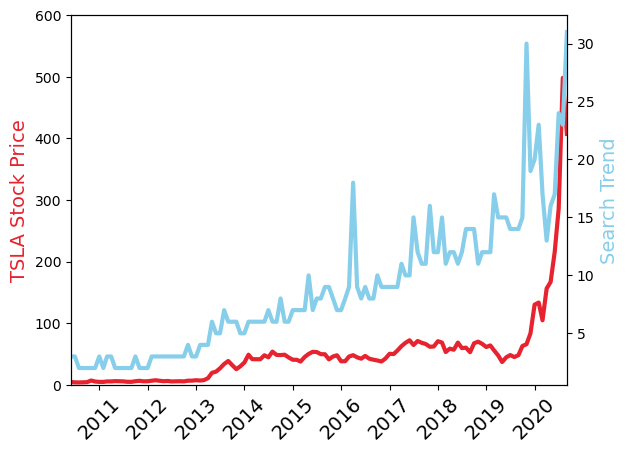

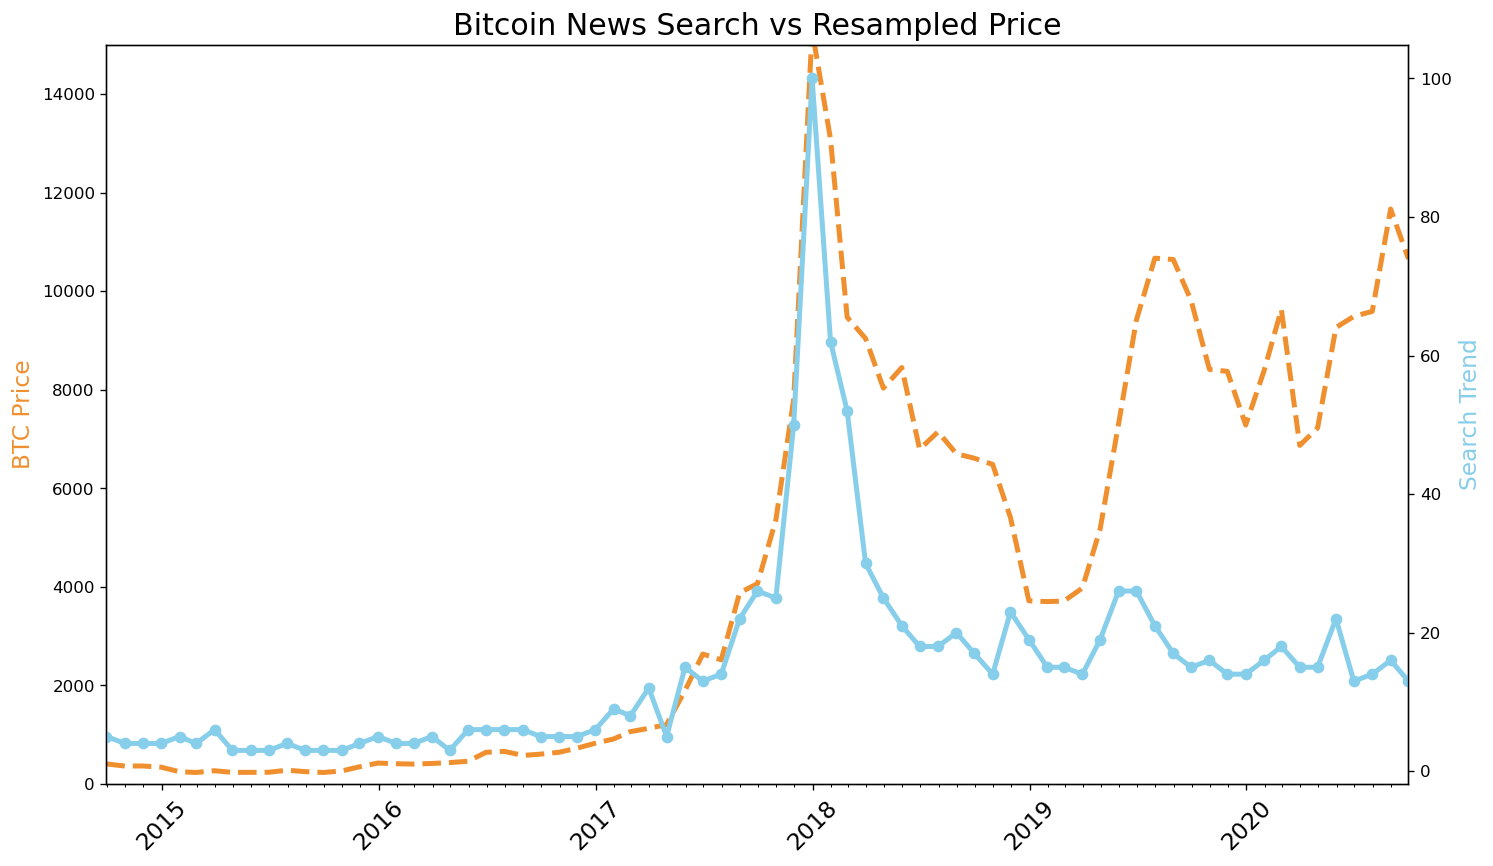

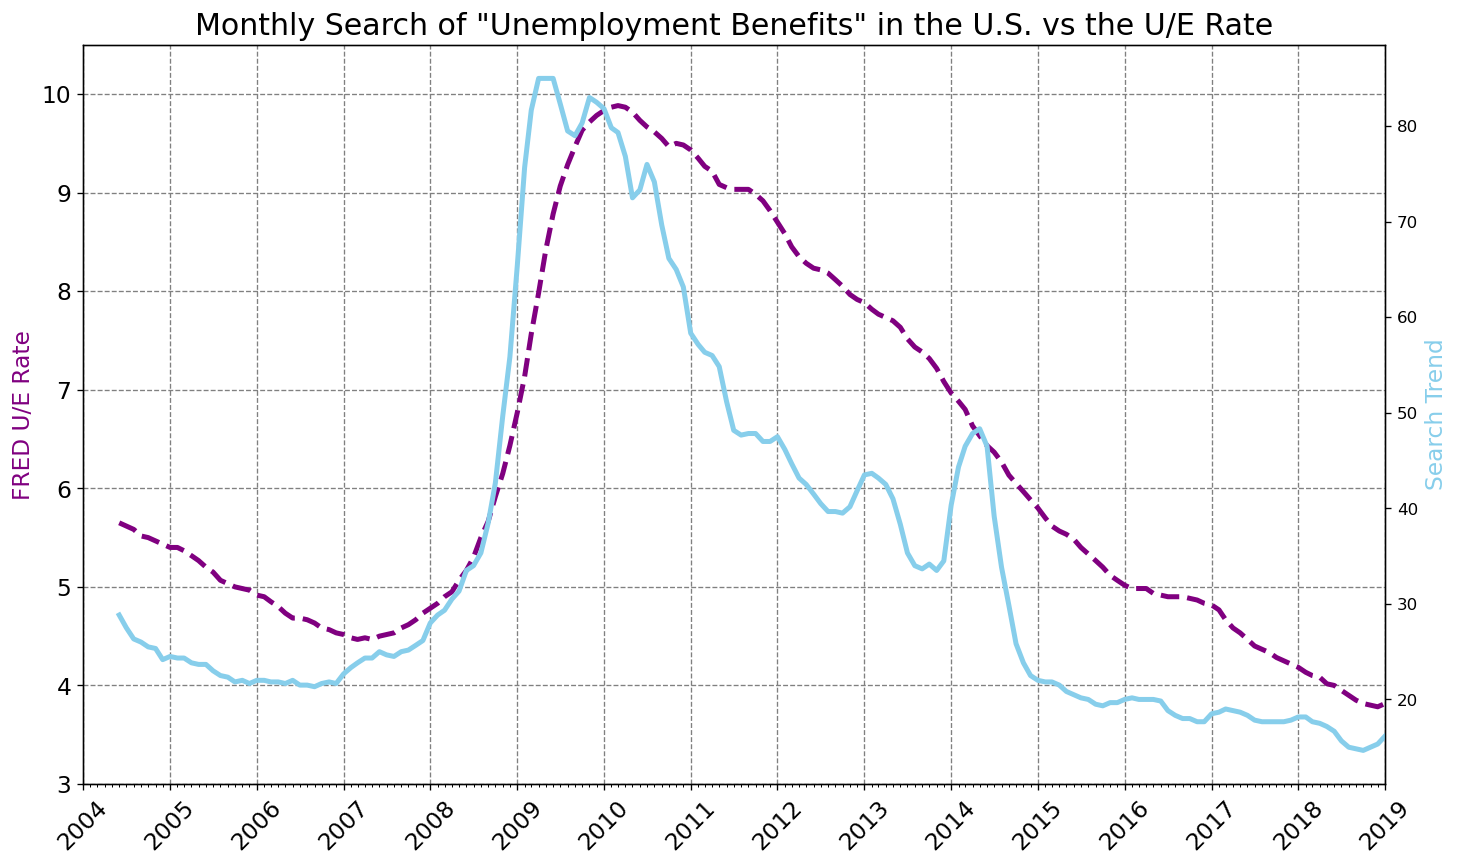

     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                       9     5.7
1  2004-02                       8     5.6
2  2004-03                       7     5.8
3  2004-04                       8     5.6
4  2004-05                       6     5.6


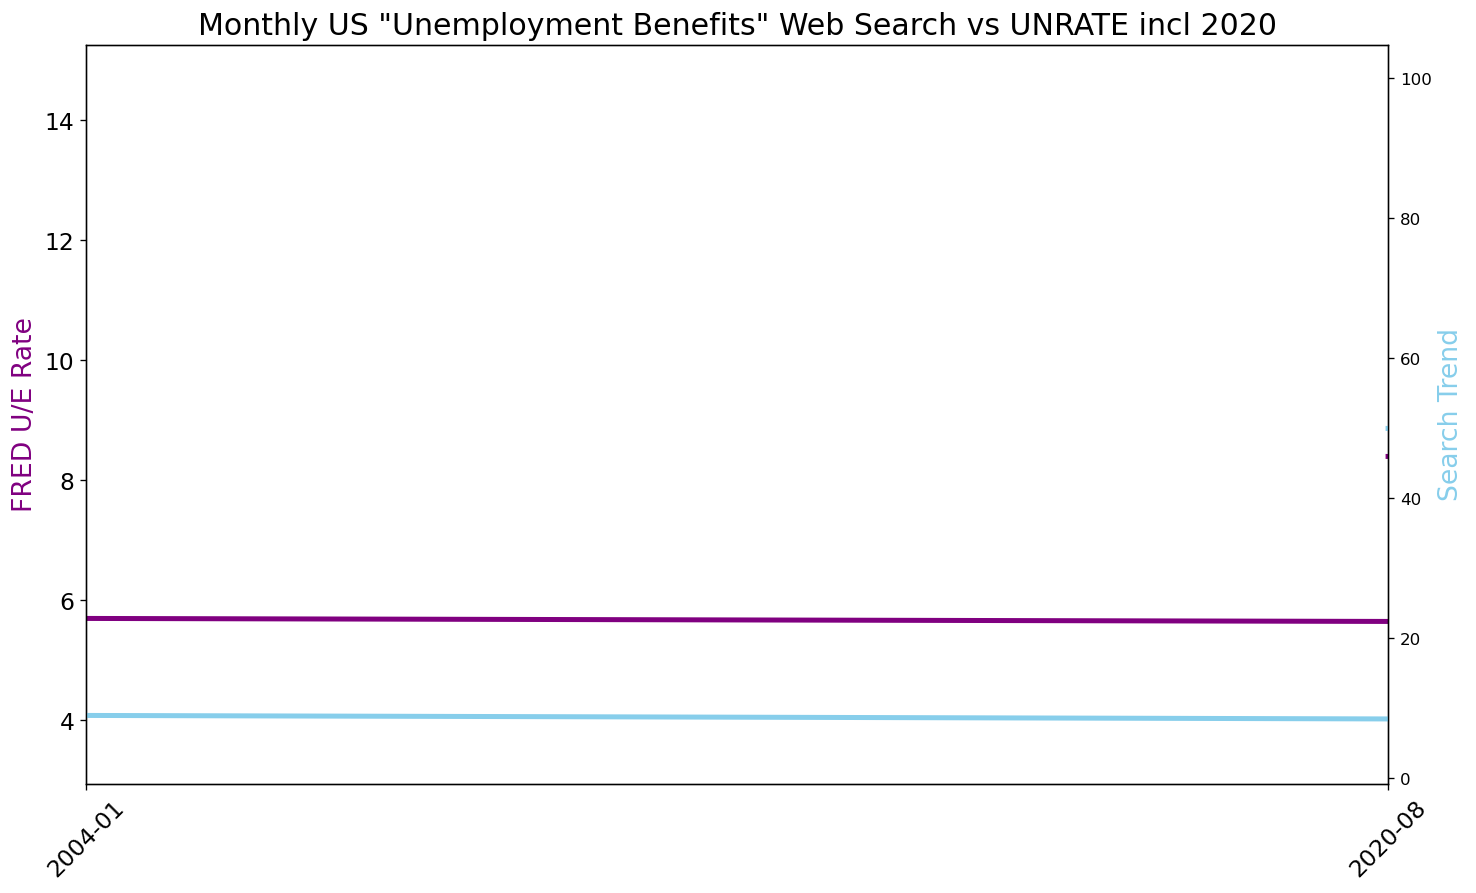

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


data = pd.read_csv("TESLA Search Trend vs Price.csv")
print(data)
print(data.shape)

#Largest value
print(f"Largest value in Tesla websearch:{data['TSLA_WEB_SEARCH'].max()}")
print(f"Largest value in Tesla websearch:{data['TSLA_WEB_SEARCH'].min()}")

# .describe(), you get a whole bunch of descriptive statistics.

des_stat = data.describe()
print(des_stat)

#Unemployment 
Unemploy = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")
print(Unemploy)
print(Unemploy.shape)


#Largest value for unemployment

print(f"Largest value in Unemployment benefits:{Unemploy['UE_BENEFITS_WEB_SEARCH'].max()}")

des_stat_unemploy = Unemploy.describe()
print(des_stat_unemploy)

#Daily Bitcoin data

daily_bitcoin = pd.read_csv("Daily Bitcoin Price.csv")
print(daily_bitcoin.head())


#Bitcoin search data
bitcoin_search = pd.read_csv("Bitcoin Search Trend.csv")
print(bitcoin_search.head())

#Check NAN Values

print(f" The Null values in data: {data.isna().values.any()}")
print(f" The Null values in data: {Unemploy.isna().values.any()}")
print(f" The Null values in data: {daily_bitcoin.isna().values.any()}")
print(f" The Null values in data: {bitcoin_search.isna().values.any()}")

#using sum to find the values

print(daily_bitcoin[daily_bitcoin["CLOSE"].isna()])
daily_bitcoin = daily_bitcoin.dropna()

print(data.dtypes)
print(Unemploy.dtypes)
print(daily_bitcoin.dtypes)
print(bitcoin_search.dtypes)

data["MONTH"] = pd.to_datetime(data["MONTH"])
Unemploy["MONTH"] = pd.to_datetime(Unemploy["MONTH"])
bitcoin_search["MONTH"] = pd.to_datetime(bitcoin_search["MONTH"])
daily_bitcoin["DATE"] = pd.to_datetime(daily_bitcoin["DATE"])


#Converting daily data to monthly data so to compare with bitcoin search data

daily_bitcoin = daily_bitcoin.resample('M', on='DATE').mean() #either we can use .last() to take last value of the month or .mean() to take vaerage value.
print(daily_bitcoin.head())


#Plotting the graph
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([data["MONTH"].min(), data["MONTH"].max()])
 
ax1.plot(data["MONTH"], data["TSLA_USD_CLOSE"], color='#E6232E', linewidth=3)
ax2.plot(data["MONTH"], data["TSLA_WEB_SEARCH"], color='skyblue', linewidth=3)
 
plt.show()

#Creating locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

#plotting for bitcoin
plt.figure(figsize=(14,8), dpi=120)
 
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([daily_bitcoin.index.min(), daily_bitcoin.index.max()])
 
# Experiment with the linestyle and markers
ax1.plot(daily_bitcoin.index, daily_bitcoin.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(daily_bitcoin.index, bitcoin_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
plt.show()

#plotting for unemployment data

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([Unemploy.MONTH.min(), Unemploy.MONTH.max()])
 
# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

#calculating rolling average

roll_Umploy = Unemploy[['UE_BENEFITS_WEB_SEARCH',  'UNRATE']].rolling(window = 6).mean()

ax1.plot(Unemploy.MONTH, roll_Umploy.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(Unemploy.MONTH, roll_Umploy.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)
 
plt.show()

#Reading new Unmploy data

new_Unemploy = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
print(new_Unemploy.head())

new_Unemploy.describe()


plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([new_Unemploy.MONTH.min(), new_Unemploy.MONTH.max()])
 
ax1.plot(new_Unemploy.MONTH, new_Unemploy.UNRATE, 'purple', linewidth=3)
ax2.plot(new_Unemploy.MONTH, new_Unemploy.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()
